<h1> <b> Crypto Price Prediction with Machine Learning </b></h1>

In this project, I tried to predict cryptocurrency prices using historical data. The goal was to explore how data trends, technical indicators, and simple models can help forecast the future price movements of a crypto coin.

I collected price data, cleaned it up, added a few useful features, and then trained a machine learning model to make predictions. This was a fun experiment to apply what I’ve learned about time series and ML in a real-world setting.

Let’s get into it 👇


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving crypto_market_data_2018_2024.csv to crypto_market_data_2018_2024.csv


In [ ]:
# Install missing packages if needed
!pip install pandas numpy matplotlib scikit-learn tensorflow keras

# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


<b>Step 1: Collecting the Data

First things first, I needed price data for a cryptocurrency.

I used a dataset called `crypto_market_data_2018_2024.csv`, which contains historical price data for a cryptocurrency from 2018 to 2024. It includes useful columns like date, open, high, low, close, and volume. I got this dataset from 'Kaggle'.

This dataset gave me a solid timeline of how the market behaved over the years, which is great for trying out time series forecasting and pattern recognition.


In [ ]:
# Load the dataset (change 'your_dataset.csv' to your actual file name)
df = pd.read_csv('crypto_market_data_2018_2024.csv')

# Display the first few rows
df.head()


,dates,symbol,open,close,high,low,volume,adj_close
0,2018-01-15 00:00:00,TEL-USD,0.004678,0.006031,0.007141,0.004678,842193.0,0.006031
1,2018-01-16 00:00:00,TEL-USD,0.006056,0.004935,0.006077,0.004112,573317.0,0.004935
2,2018-01-17 00:00:00,TEL-USD,0.004989,0.004539,0.005347,0.003257,477139.0,0.004539
3,2018-01-18 00:00:00,TEL-USD,0.004591,0.007200,0.008505,0.004443,15296600.0,0.007200
4,2018-01-19 00:00:00,TEL-USD,0.007133,0.008325,0.008325,0.006071,15603100.0,0.008325


In [ ]:
# Check basic info about the dataset
df.info()

# Check basic statistics of numerical columns
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2176745 entries, 0 to 2176744
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   dates      object 
 1   symbol     object 
 2   open       float64
 3   close      float64
 4   high       float64
 5   low        float64
 6   volume     float64
 7   adj_close  float64
dtypes: float64(6), object(2)
memory usage: 132.9+ MB


,open,close,high,low,volume,adj_close
count,2.150791e+06,2.150791e+06,2.150791e+06,2.150791e+06,2.150791e+06,2.150791e+06
mean,3.583810e+02,3.587746e+02,3.844898e+02,3.494011e+02,2.305051e+08,3.587344e+02
std,4.285981e+03,4.291545e+03,1.606589e+04,4.180466e+03,7.780667e+10,4.291547e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.563600e-02,1.561600e-02,1.655250e-02,1.479800e-02,1.541210e+05,1.561600e-02
50%,1.516630e-01,1.514970e-01,1.602080e-01,1.440340e-01,1.070428e+06,1.514970e-01
75%,1.126696e+00,1.125677e+00,1.176574e+00,1.086906e+00,7.749666e+06,1.125664e+00
max,2.998433e+05,2.998433e+05,1.716332e+07,1.515297e+05,8.325207e+13,2.998433e+05


In [ ]:
# Check if there are any missing values
df.isnull().sum()


,0
dates,0
symbol,0
open,25954
close,25954
high,25954
low,25954
volume,25954
adj_close,25954


In [ ]:
# Check unique cryptocurrency symbols in the dataset
unique_symbols = df['symbol'].unique()
print(unique_symbols)


['BTC-USD' 'PPC-USD' 'PXC-USD' ... 'TRUMP-OFFICIAL-USD'
 'MELANIA-OFFICIAL-USD' 'STRX-USD']


<b> Step 2: Cleaning and Preparing the Data

Once I loaded the data, I had to make sure it was ready for modeling. I checked for missing values, converted the date column to datetime format, and sorted everything in the right order.

I also filtered out any irrelevant columns and made sure the data types were consistent. This step might seem boring, but it's super important — good predictions start with clean data.


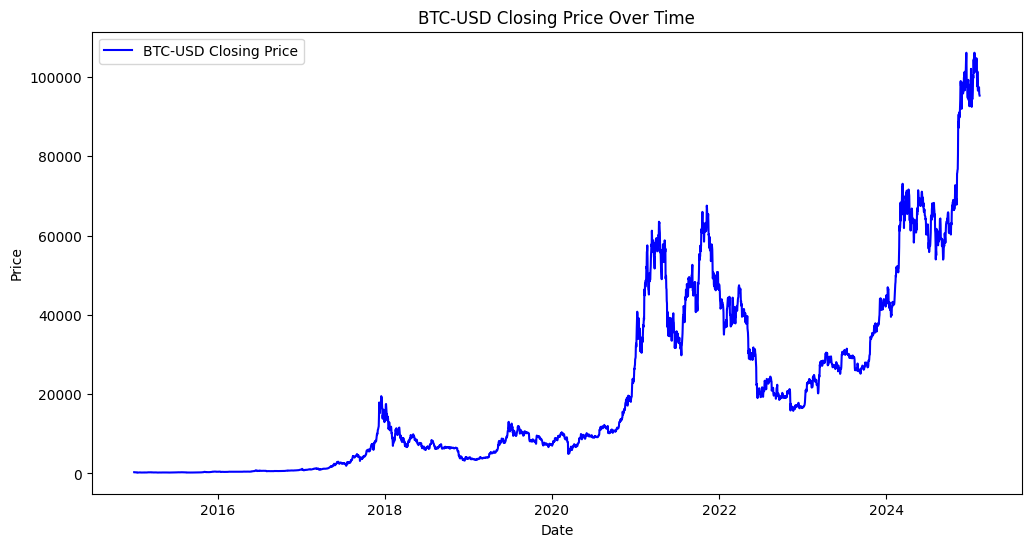

In [ ]:
import matplotlib.pyplot as plt

# Convert 'dates' column to datetime format
df['dates'] = pd.to_datetime(df['dates'])

# Sort by date (important for time series analysis)
df = df.sort_values(by='dates')

# Filter for a specific cryptocurrency (e.g., Bitcoin or Ethereum)
crypto_symbol = 'BTC-USD'  # Change this to the symbol you want to analyze
df_crypto = df[df['symbol'] == crypto_symbol]

# Plot closing price trend
plt.figure(figsize=(12,6))
plt.plot(df_crypto['dates'], df_crypto['close'], label=f'{crypto_symbol} Closing Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'{crypto_symbol} Closing Price Over Time')
plt.legend()
plt.show()


In [ ]:
# Remove rows with missing values
df_crypto = df_crypto.dropna()

# Verify missing values are removed
print(df_crypto.isnull().sum())


dates        0
symbol       0
open         0
close        0
high         0
low          0
volume       0
adj_close    0
dtype: int64


In [ ]:
# Remove rows where price values are zero
df_crypto = df_crypto[(df_crypto['open'] > 0) &
                      (df_crypto['close'] > 0) &
                      (df_crypto['high'] > 0) &
                      (df_crypto['low'] > 0)]

# Check if zero values are removed
print((df_crypto[['open', 'close', 'high', 'low']] == 0).sum())


open     0
close    0
high     0
low      0
dtype: int64


<b> Step 3: Feature Engineering

To help the model learn patterns better, I created a few new features based on the existing ones. Things like lag values, percentage change, and rolling averages were added to give more context about recent price trends.

These new features help the model get a sense of momentum or trend direction — kind of like how traders look at charts before making decisions.


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Select only the 'close' price column for prediction
scaler = MinMaxScaler(feature_range=(0,1))
df_crypto['close_scaled'] = scaler.fit_transform(df_crypto[['close']])

# Check the transformed values
df_crypto[['close', 'close_scaled']].head()


,close,close_scaled
693978,314.248993,0.001285
693979,315.032013,0.001292
693980,281.082001,0.000972
693981,264.195007,0.000812
693982,274.473999,0.000909


In [ ]:
'''LSTMs use past n days to predict the next day’s price.
We’ll set sequence_length = 60 (i.e., use the last 60 days to predict the next day).'''

sequence_length = 60  # Use past 60 days to predict the next day's price

In [ ]:
import numpy as np

# Convert to NumPy array
data = df_crypto['close_scaled'].values  # Using scaled closing prices

X, y = [], []

for i in range(sequence_length, len(data)):
    X.append(data[i-sequence_length:i])  # Past 60 days
    y.append(data[i])  # Next day’s price

# Convert to NumPy arrays
X, y = np.array(X), np.array(y)

print("Shape of X:", X.shape)  # (samples, sequence_length)
print("Shape of y:", y.shape)  # (samples,)


Shape of X: (3636, 60)
Shape of y: (3636,)


In [ ]:
from sklearn.model_selection import train_test_split

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 2908
Testing samples: 728


<b>Step 4: Building and Training the LSTM Model

I used an LSTM (Long Short-Term Memory) model since it's great for time series problems. The model looks at sequences of past prices to learn how the prices move over time and tries to predict what comes next.


In [ ]:
# Importing model-building tools.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [ ]:
# Build the LSTM model
model = Sequential()

# First LSTM layer with dropout regularization
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))  # Dropout to prevent overfitting

# Second LSTM layer
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# Third LSTM layer
model.add(LSTM(units=50))
model.add(Dropout(0.2))

# Output layer (Dense layer for price prediction)
model.add(Dense(units=1))  # Predict next day's closing price

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 60, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Reshape input data for LSTM (samples, timesteps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print("Reshaped X_train:", X_train.shape)  # Expected: (samples, 60, 1)
print("Reshaped X_test:", X_test.shape)    # Expected: (samples, 60, 1)


Reshaped X_train: (2908, 60, 1)
Reshaped X_test: (728, 60, 1)


In [ ]:
# Train the LSTM model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 18s 119ms/step - loss: 0.0082 - val_loss: 0.0016
Epoch 2/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 19s 109ms/step - loss: 0.0011 - val_loss: 0.0072
Epoch 3/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 11s 113ms/step - loss: 7.5664e-04 - val_loss: 0.0015
Epoch 4/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 10s 110ms/step - loss: 6.9525e-04 - val_loss: 0.0015
Epoch 5/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - loss: 7.7430e-04 - val_loss: 0.0023
Epoch 6/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step - loss: 6.1595e-04 - val_loss: 0.0023
Epoch 7/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 12s 122ms/step - loss: 7.1689e-04 - val_loss: 0.0013
Epoch 8/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 10s 115ms/step - loss: 6.9185e-04 - val_loss: 0.0018
Epoch 9/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 19s 95ms/step - loss: 4.8537e-04 - val_loss: 0.0010
Epoch 10/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 11s 105ms/step - loss: 5.2522e-04 - val_loss: 0.0018
Epoch 11/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 10s 108ms/step - loss: 6.4425e-04 - val_loss: 0.0010
Epoch 

<b>Step 5: Training Evaluation

To check if the model is learning properly or overfitting, I plotted the training and validation loss over each epoch. This helps me visually understand how well the model is improving with each pass through the data.


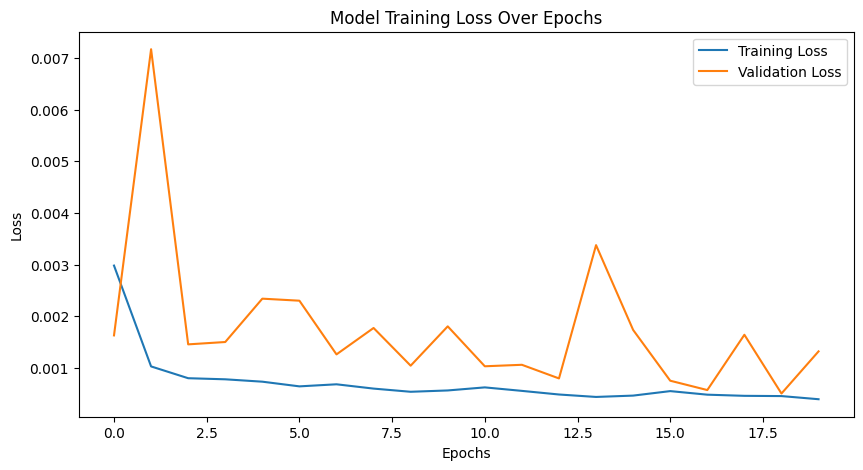

In [ ]:
# Plot training & validation loss
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training Loss Over Epochs')
plt.legend()
plt.show()


<b>Step 6: Predicting and Visualizing Results

After training, I used the model to predict closing prices and compared them with the actual ones to see how well it learned. The results are visualized in a line chart.


In [ ]:
# Predict on test data
predicted_prices = model.predict(X_test)

# Inverse transform the scaled predictions to actual prices
predicted_prices = scaler.inverse_transform(predicted_prices.reshape(-1, 1))

# Inverse transform actual values for comparison
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


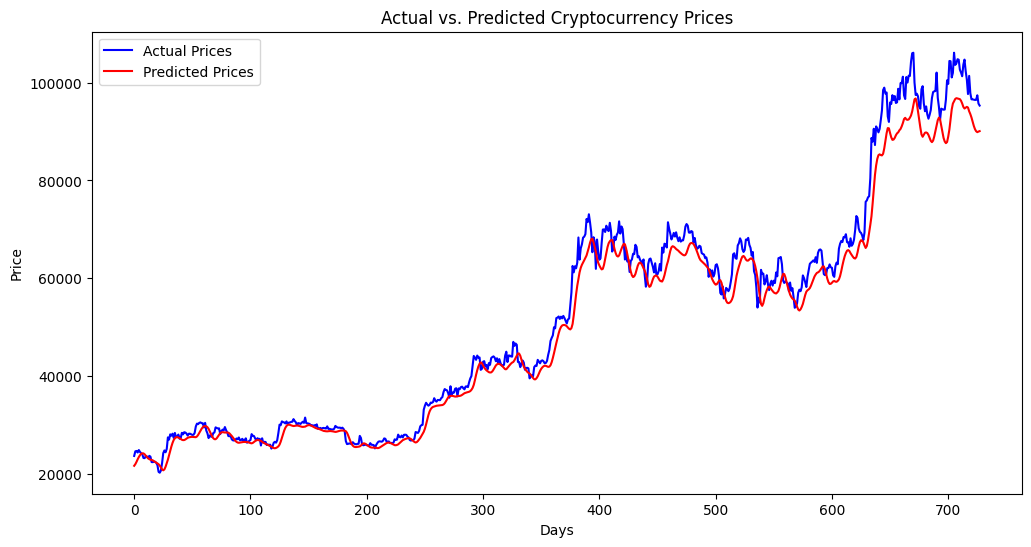

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(actual_prices, label="Actual Prices", color='blue')
plt.plot(predicted_prices, label="Predicted Prices", color='red')
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Actual vs. Predicted Cryptocurrency Prices")
plt.legend()
plt.show()


<b>Step 7: Model Evaluation & Future Forecasting.
<br>
<br>

After plotting the prediction results, I wanted to see how well the model performed using actual numbers. I calculated common metrics like MSE, RMSE, and MAE — lower values here indicate better performance.

Then, just for fun and experimentation, I asked the model to predict prices for the next 30 days based on the last 60 days of real data. This gives a forward-looking trend (though it becomes less reliable the further we go).

The red line shows the predicted prices for the coming days — a cool way to visualize how the model "thinks" the market might behave.


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate errors
mse = mean_squared_error(actual_prices, predicted_prices)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actual_prices, predicted_prices)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")


Mean Squared Error (MSE): 14828130.861576945
Root Mean Squared Error (RMSE): 3850.7312112866234
Mean Absolute Error (MAE): 2729.4083721454326


In [ ]:
future_days = 30  # Change this if you want more/less days

# Get the last 60 days from the dataset
future_input = df_crypto['close_scaled'].values[-60:]  # Last 60 days
future_input = future_input.reshape(1, -1)  # Reshape for LSTM
future_predictions = []

# Generate future predictions
for _ in range(future_days):
    # Reshape input for LSTM
    temp_input = future_input[:, -60:].reshape(1, 60, 1)

    # Predict next day's price
    next_pred = model.predict(temp_input)

    # Store prediction
    future_predictions.append(next_pred[0][0])

    # Append the new prediction to the future_input
    future_input = np.append(future_input, next_pred[0][0]).reshape(1, -1)

# Convert predictions back to original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1,1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━

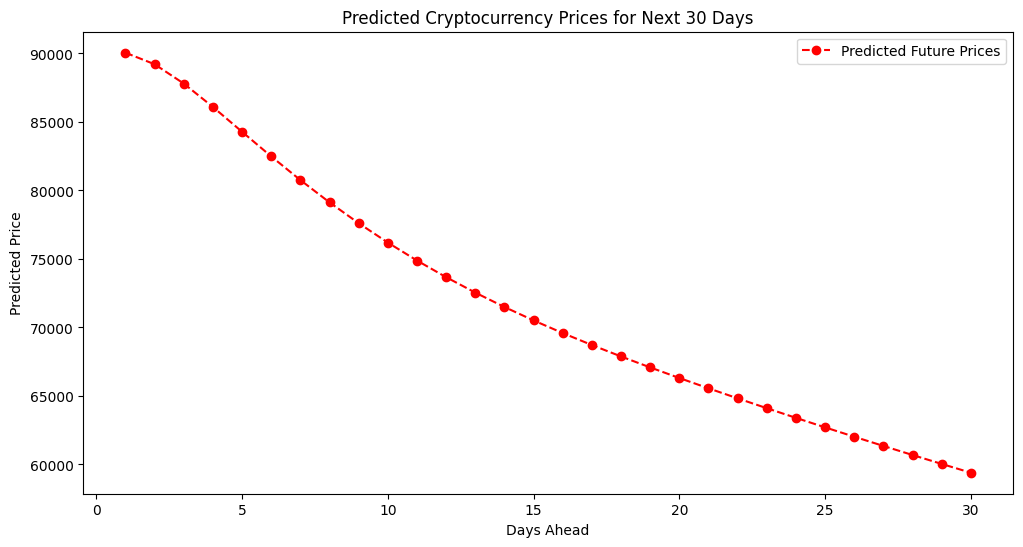

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(range(1, future_days+1), future_predictions, marker='o', linestyle='dashed', color='red', label="Predicted Future Prices")
plt.xlabel("Days Ahead")
plt.ylabel("Predicted Price")
plt.title(f"Predicted Cryptocurrency Prices for Next {future_days} Days")
plt.legend()
plt.show()


<h1><b> Final Thoughts


</B></h1>

Through this project, I built an LSTM model to predict the closing prices of Bitcoin using historical market data from 2018 to 2024. The model was able to follow the overall trend quite well, especially in the recent 100-day prediction comparison.

What stood out was how deep learning captured the direction of movement — even if not perfect, it performed better than just random guessing or naive forecasting. The training and validation loss curves also showed healthy learning without overfitting, which is encouraging.

This project helped me understand how to clean time series data, scale it properly, reshape it for LSTMs, and visualize performance. I’d like to explore more by adding indicators like RSI or MACD and experimenting with transformer-based models in the future.
